# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

*   데이터의 형식을 예측 후 그대로 고정적으로 지정해서 가져옴 (데이터 구성이 예측이 벗어난 경우 (리뉴얼이나, 팝업창때메 평소랑 다름)는 동작이 잘 안될수 도 있다)
* 고로 스크래핑 데이터는 오류가 많을 수 밖에 없다 -> 데이터가 비어있거나 형식이 틀리고, 아웃라이어가 많다
(문자열 같은경우 앞뒤 공백이 많고, html 태그가 같이 포함되는경우가 많다, 인코딩에 의해 깨진 문자도 많다.)
(숫자같은 경우는 최대값이나 최소값으로 잘못기입되는 경우가 많다. 숫자대신 문자열이 들어가 분석에 차질이 생김)



### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = 'e808743bea20e4a89b105256b9d5941b'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Li# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.* #모든 파일 삭제 추후 다시 실행시 파일을 엎어쓰는지 선택을 안해도 됨
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'





rm: cannot remove '*.*': No such file or directory
 94% 248M/262M [00:02<00:00, 153MB/s]
100% 262M/262M [00:02<00:00, 116MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [9]:

df = pd.read_csv('vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [10]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기

df.head()
#year을 age로환산해서 만든다
#범주형 데이터 cylinder fuel 은 누락된 데이터가 있을 확률이 높아보임
#odometer은 정확히 적혀잇는 정도가 다 다를것같아보임
#VIN 은 별로 안중요해보임

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [11]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [12]:
df.isna().sum() #null이 빠져있는 값들이 많아보인다
#condition은 중요한정보인데 많이 빠져있다
#주요한 요소들로 예상되는데 비어있는 값들이 많다

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [18]:
df.describe()

,price,odometer,county,age
count,4.268800e+05,4.224800e+05,0.0,425675.000000
mean,7.519903e+04,9.804333e+04,NaN,9.764809
std,1.218228e+07,2.138815e+05,NaN,9.452120
min,0.000000e+00,0.000000e+00,NaN,-1.000000
25%,5.900000e+03,3.770400e+04,NaN,4.000000
50%,1.395000e+04,8.554800e+04,NaN,8.000000
75%,2.648575e+04,1.335425e+05,NaN,13.000000
max,3.736929e+09,1.000000e+07,NaN,121.000000


In [13]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [15]:
df.drop([ 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date'], axis=1, inplace=True) #머신러닝에 분석이 어렵거나 비어있는 값이 많은 경우는 빼버림

In [16]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True) #year를 age(차의 나이)로 바꾼다 _> 분석에 더 적합

In [19]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

### 문제 5. 범주형 데이터의 통계 분석하기


In [ ]:
df.columns

In [20]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기


len(df['manufacturer'].value_counts()) #총 43개의 종류
df['manufacturer'].value_counts()


ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


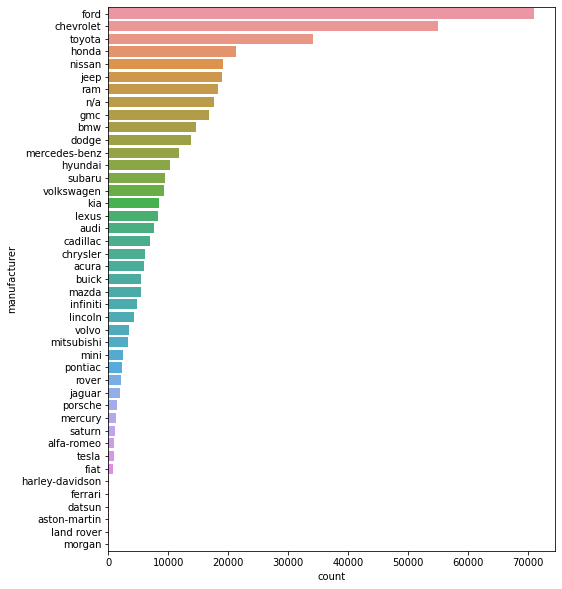

In [21]:
fig = plt.figure(figsize=(8, 10))
#팔린 차의 제조사 별로 팔린횟수 기준으로 내림차순한다
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [22]:
#모든 차의 모델을 다 출력해본다 ->굉장히 많음
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

  # num 이 1인 값 즉 한번밖에 안된값은 제대로 스크랩된 데이터가 대부분 아니다

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
c550o 1
sterling semi truck 1
flex sle limited 1
Cheverolet Camaro SS 1
accord ex l v6sedan 5a 1
camary hybrid 1
cx-9 touring automatic 1
xc70 t6 1
f-150 koi 1
MACK CV713 Granite Dump Truck 1
Oldsmobile Regency 1
f550 4x4 flat bed diesel 1
911 / 993 1
tiguan sel premium 1
230i xdrive 1
crysler town & country 1
f-150 xlt supercrew 6.5' 1
1964 NOVA 1
camaro rs v6 1
gsx & gn 1
325xi 4-door awd 1
wrangler se 4x4 1
sorento 3.6 1
sienna fwd limited white 1
WOLF EX-150 1
1979 International 1
XKE 1
1967 Chevelle 1
q7 quattro 1
atlas sel 1
xj8 xj6 1
altma 1
Plymouth barracuda 1
x5 4.4i top 1
tacoma prerunner sr5 rwd 1
328i sedan luxury 1
2004 F250 1
discovery hse sport 1
tundra off road 4x4 1
Mack CHN613 1
rav4 xle 4dr suv 1
Volskwagen Jetta TDI 1
golf 2012 1
rx 330 base 1
Oldsmobile Bravada AWD  Smart Trak 1
352i 1
srx luxory collection 1
saab 9-5 aero 1
OLDSMOBILE SEDAN 1
q7 3.0t sline prestige awd 1
300 300s rwd 1
tacoma x-cab 1
intrepid r/t 1
09 crown vic

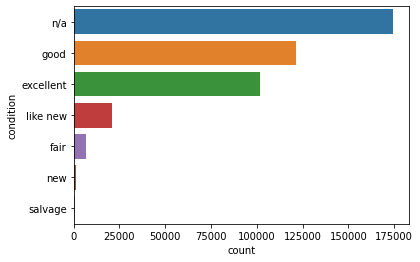

In [23]:
# new 도 na에 포함할지 생각해 봐야함
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

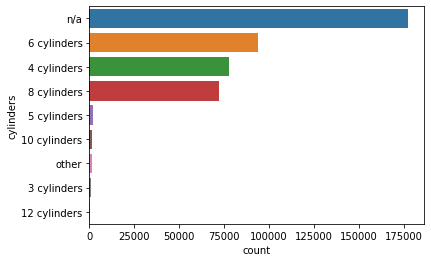

In [24]:
# 
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

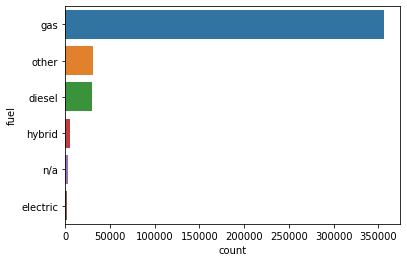

In [25]:
#웬만하면 gas 차 휘발유
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

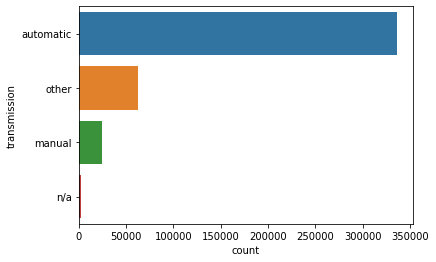

In [26]:
# 자동기어인 애들이 주로다

sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

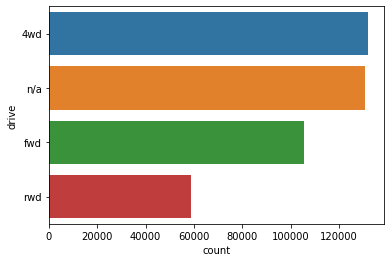

In [27]:
#4개가 다 비슷해서 그대로 써도 무난할듯
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

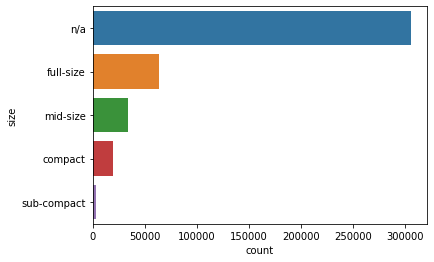

In [28]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

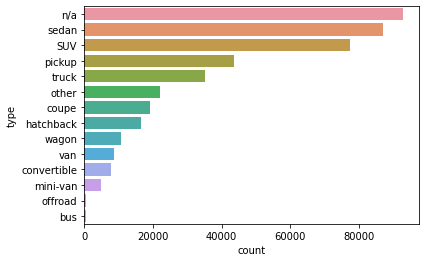

In [29]:

sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

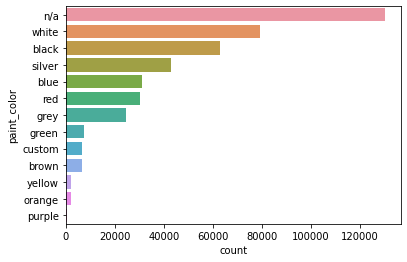

In [30]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

### 문제 6. 수치형 데이터의 통계 분석하기

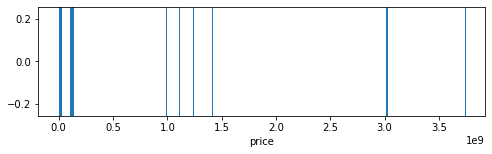

In [31]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
fig = plt.figure(figsize=(8, 2))
#box플랏으로 봣을때 좋은 결과가 안나옴
#
sns.rugplot(x='price', data=df, height=1)





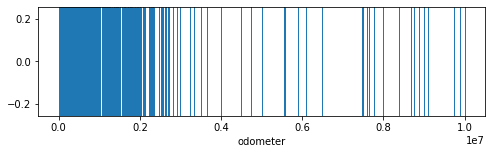

In [32]:
fig = plt.figure(figsize=(8, 2))
#outlier가 많아서 rugplot으로 해본다
sns.rugplot(x='odometer', data=df, height=1)

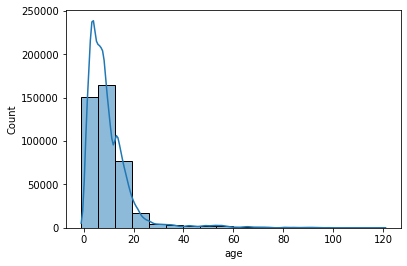

In [33]:
sns.histplot(x='age', data=df, bins=18, kde=True) #이건 무난하게 시각화가 됨

## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

In [ ]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기





### 문제 8. 범주형 데이터 클리닝하기

In [ ]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기






### 문제 9. 수치형 데이터 시각화하여 분석하기

In [ ]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# Hint) 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용




### 문제 10. 수치형 데이터 클리닝하기

In [ ]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기






### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num =

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat =

# 입출력 데이터 통합하기
X = 
y = 

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_reg = 




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = 





## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용






### 문제 17. 에러 값의 히스토그램 확인하기


In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test



